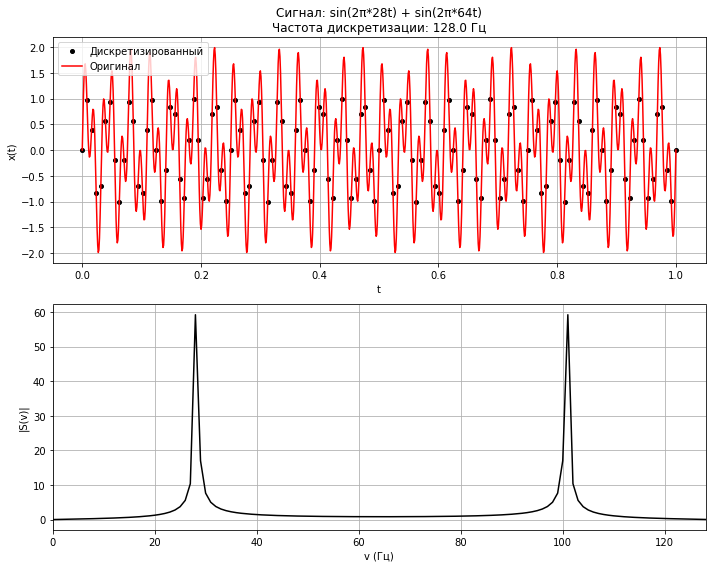

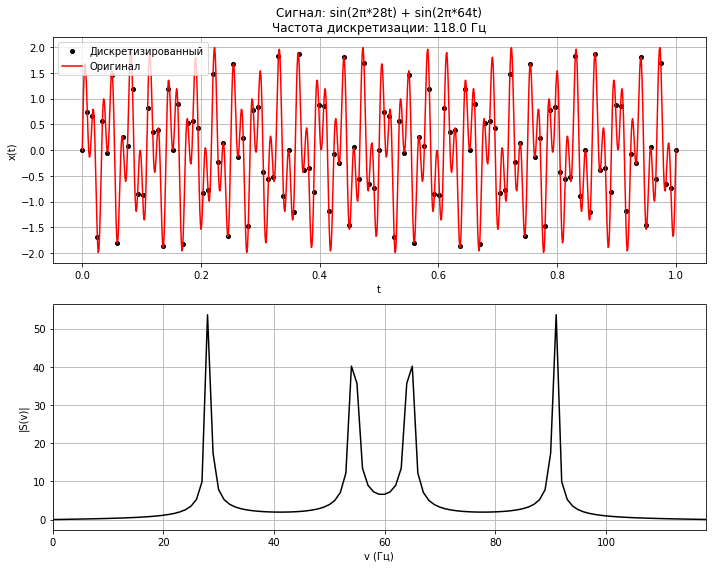

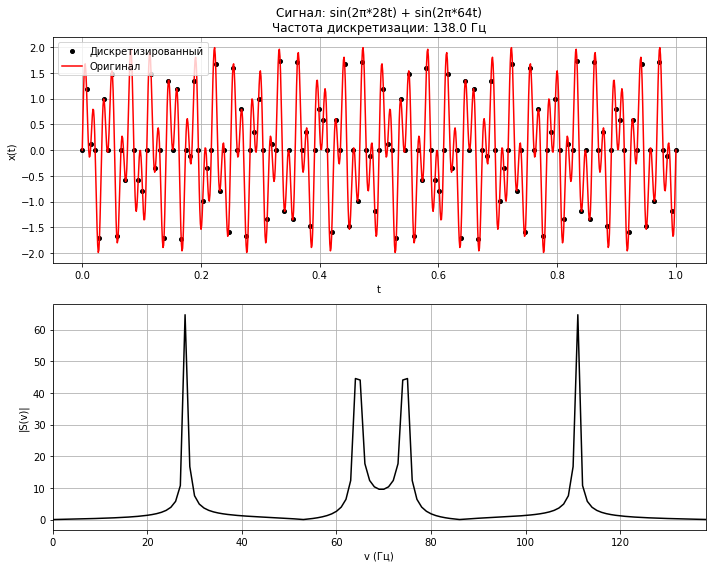

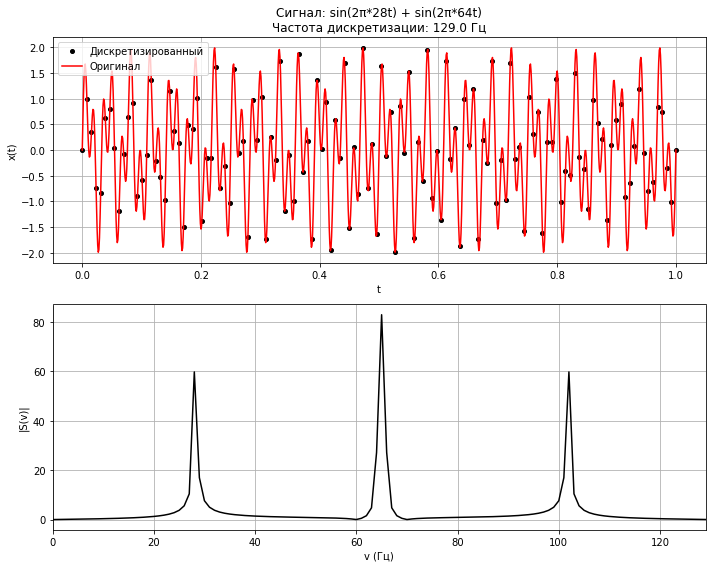

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Часть 1. Пункт 1,2,3
# Параметры
a = 0
b = 1
v1 = 28
v2 = 64

f0 = 2 * max(v1, v2) # Частота Найквиста
f1 = f0 - 10
f2 = f0 + 10
f3 = f0 + 1

# Функция генерации сигнала
def gen_signal(t, v1, v2):
    return np.sin(2 * np.pi * v1 * t) + np.sin(2 * np.pi * v2 * t)

# Исходный сигнал
tr = np.arange(a, b + 0.001, 0.001)
sigr = gen_signal(tr, v1, v2)

# Список частот дискретизации
sampling_frequencies = [f0, f1, f2, f3]

# Цикл по частотам дискретизации
for f_s in sampling_frequencies:
    ts = 1 / f_s
    t = np.arange(a, b + ts, ts)

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Подграфик 1: временная область
    sig = gen_signal(t, v1, v2)
    axes[0].plot(t, sig, 'k.', label='Дискретизированный', markersize=8)
    axes[0].plot(tr, sigr, 'r-', label='Оригинал')
    axes[0].set_xlabel('t')
    axes[0].set_ylabel('x(t)')
    axes[0].grid(True)
    axes[0].set_title(f"Сигнал: sin(2π*{v1}t) + sin(2π*{v2}t)\nЧастота дискретизации: {f_s:.1f} Гц")
    axes[0].legend()

    # Подграфик 2: частотная область
    numpts = len(t)
    v = f_s * np.linspace(0, 1, numpts)
    S = np.fft.fft(sig)
    axes[1].plot(v, np.abs(S), 'k-')
    axes[1].set_xlim([0, np.max(v)])
    axes[1].set_xlabel('v (Гц)')
    axes[1].set_ylabel('|S(v)|')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


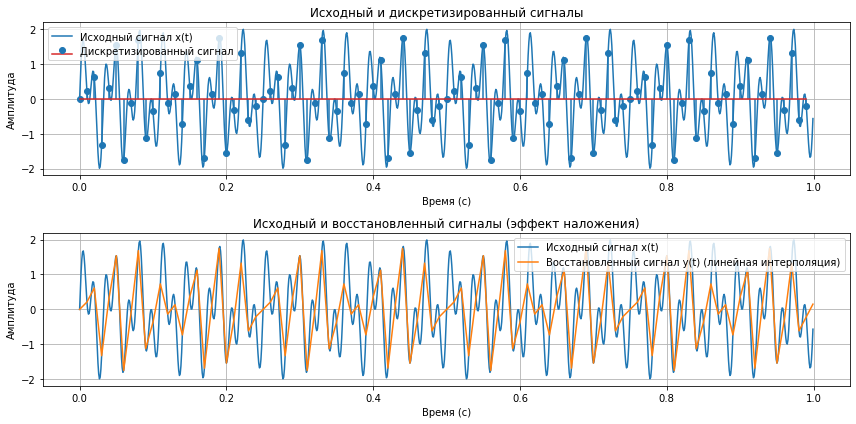

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Часть 1. Пункт 4
# Параметры сигнала
v1 = 28 # Гц
v2 = 64 # Гц
t_end = 1 # с

# Исходный сигнал
t = np.arange(0, t_end, 0.001)
x_t = np.sin(2 * np.pi * v1 * t) + np.sin(2 * np.pi * v2 * t)

# Частота дискретизации (ниже Найквиста)
fs_alias = 100 # Гц
dt_alias = 1 / fs_alias
n_alias = int(t_end / dt_alias)

# Дискретизация с частотой ниже Найквиста
t_alias = np.arange(n_alias) * dt_alias
x_alias = np.sin(2 * np.pi * v1 * t_alias) + np.sin(2 * np.pi * v2 * t_alias)

# Восстановление с помощью линейной интерполяции
f_interp = interp1d(t_alias, x_alias, kind='linear', fill_value="extrapolate") #fill_value="extrapolate" добавляет экстраполяцию
y_t = f_interp(t)


# Графики
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x_t, label='Исходный сигнал x(t)')
plt.stem(t_alias, x_alias, label='Дискретизированный сигнал', use_line_collection=True)
plt.title('Исходный и дискретизированный сигналы')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, x_t, label='Исходный сигнал x(t)')
plt.plot(t, y_t, label='Восстановленный сигнал y(t) (линейная интерполяция)')
plt.title('Исходный и восстановленный сигналы (эффект наложения)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



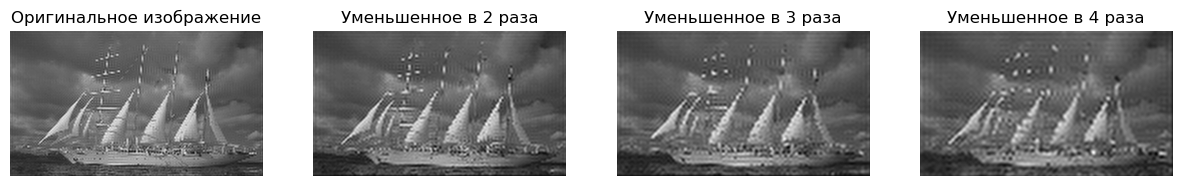

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
# Пункт 5
fd = imread('var6.png' , as_gray=True ) # считываем изображение
M, N = fd.shape # размер изображения fd
k = 3 # коэф. прорежывания
ff = fd[::k , ::k] # прореженное изображение
Mk, Nk = ff.shape # размеры прореженного изображения
# функции Котельникова задаём таблично в SincArray
ColumnInd = np.arange(0 , max(Mk, Nk))
SincArray = np.zeros((max(M, N), max(Mk, Nk)))
for j in range (max(M, N)):
    SincArray[j] = np.sinc(j/k - ColumnInd )
# получаем интерполированное по функции Котельникова изображение:
F = SincArray[ :M, :Mk] @ ff @ np.transpose(SincArray[ : N, : Nk ] )

k = 4 # коэф. прорежывания
ff = fd[::k , ::k] # прореженное изображение
Mk, Nk = ff.shape # размеры прореженного изображения
# функции Котельникова задаём таблично в SincArray
ColumnInd = np.arange(0 , max(Mk, Nk))
SincArray = np.zeros((max(M, N), max(Mk, Nk)))
for j in range (max(M, N)):
    SincArray[j] = np.sinc(j/k - ColumnInd )
# получаем интерполированное по функции Котельникова изображение:
F1 = SincArray[ :M, :Mk] @ ff @ np.transpose(SincArray[ : N, : Nk ] )

k = 5 # коэф. прорежывания
ff = fd[::k , ::k] # прореженное изображение
Mk, Nk = ff.shape # размеры прореженного изображения
# функции Котельникова задаём таблично в SincArray
ColumnInd = np.arange(0 , max(Mk, Nk))
SincArray = np.zeros((max(M, N), max(Mk, Nk)))
for j in range (max(M, N)):
    SincArray[j] = np.sinc(j/k - ColumnInd )
# получаем интерполированное по функции Котельникова изображение:
F2 = SincArray[ :M, :Mk] @ ff @ np.transpose(SincArray[ : N, : Nk ] )

k = 6 # коэф. прорежывания
ff = fd[::k , ::k] # прореженное изображение
Mk, Nk = ff.shape # размеры прореженного изображения
# функции Котельникова задаём таблично в SincArray
ColumnInd = np.arange(0 , max(Mk, Nk))
SincArray = np.zeros((max(M, N), max(Mk, Nk)))
for j in range (max(M, N)):
    SincArray[j] = np.sinc(j/k - ColumnInd )
# получаем интерполированное по функции Котельникова изображение:
F3 = SincArray[ :M, :Mk] @ ff @ np.transpose(SincArray[ : N, : Nk ] )

FFs=[F1,F2,F3]
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(F, cmap='gray')
plt.axis('off')
for i, FF in enumerate(FFs):
    plt.subplot(1, 4, i + 2)
    plt.title(f'Уменьшенное в {i+2} раза')
    plt.imshow(FF, cmap='gray')
    plt.axis('off')
plt.show()

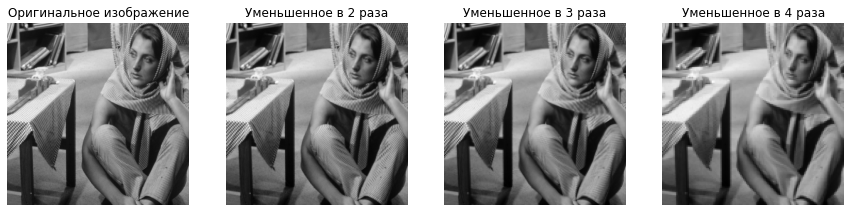

In [76]:
from skimage import io, transform
import matplotlib.pyplot as plt

image = io.imread('var5.png')

shrink_factors = [2, 3, 4]
new_sizes = [(image.shape[0] / factor, image.shape[1] / factor) for factor in shrink_factors]

resized_images = []
for size in new_sizes:
    resized_image = transform.resize(image, size, anti_aliasing=True)
    resized_images.append(resized_image)
    
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')
plt.axis('off')
for i, resized_image in enumerate(resized_images):
    plt.subplot(1, 4, i + 2)
    plt.title(f'Уменьшенное в {shrink_factors[i]} раза')
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
plt.show()

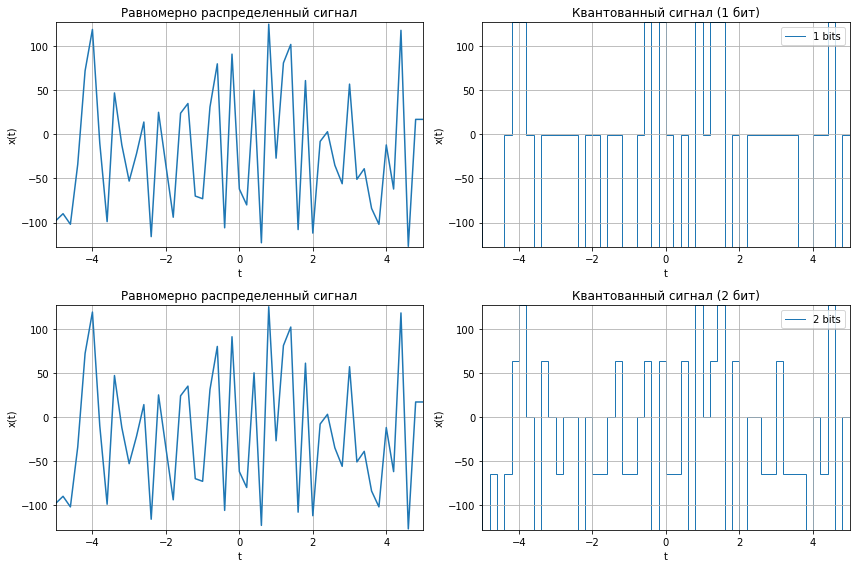

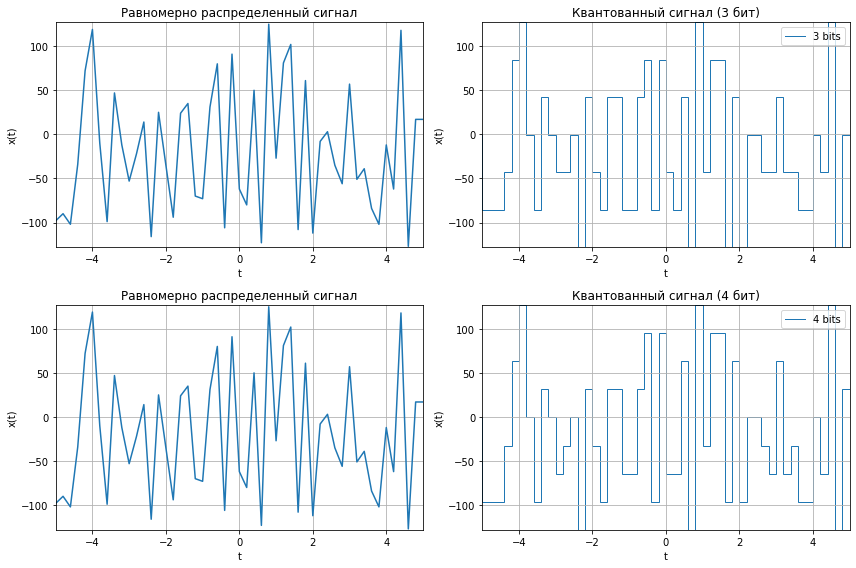

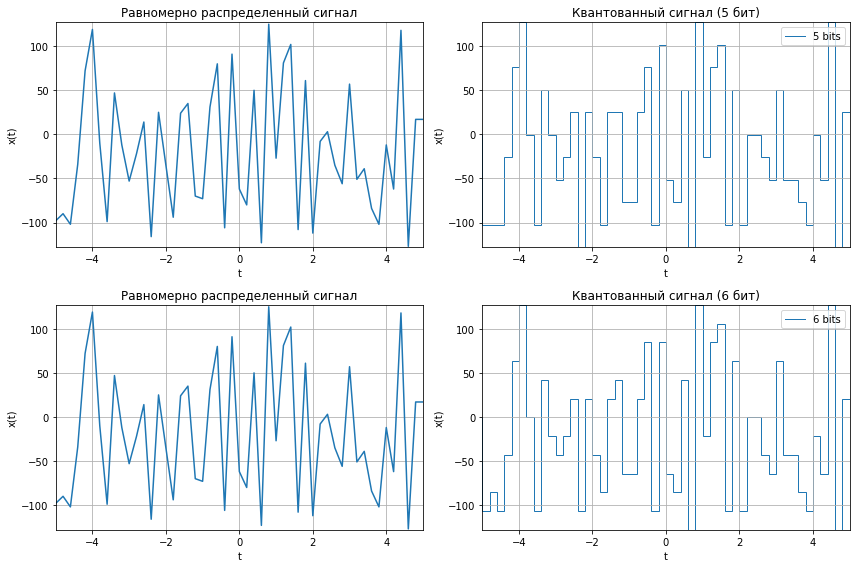

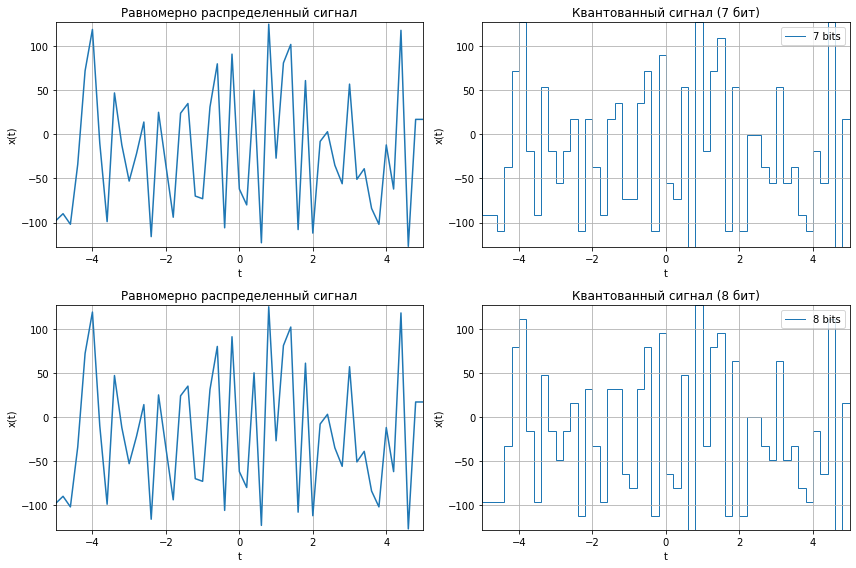

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#Часть 2. Пункт 1,2
# Параметры
a = -5
b = 5
step = 0.2
t = np.arange(a, b + step, step)

# Функция генерации случайного сигнала
def gen_rand_sig(t, xmin, xmax):
    return np.random.randint(xmin, xmax + 1, size=len(t))

# Генерация сигнала
xmin = -128
xmax = 127
x = gen_rand_sig(t, xmin, xmax)

# Функция равномерного квантования
def uquant(x, bits, xmin, xmax):
    levels = 2*bits
    q = (xmax - xmin) / levels
    return np.round((x - xmin) / q) * q + xmin


# Цикл по количеству битов
for n in range(1, 5):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Создаем сетку графиков 2x2

    for j in range(2):
        bits = (n - 1) * 2 + j +1 #Исправлено

        # Исходный сигнал
        axes[j, 0].plot(t, x)
        axes[j, 0].set_xlabel('t')
        axes[j, 0].set_ylabel('x(t)')
        axes[j, 0].grid(True)
        axes[j, 0].set_xlim([a, b])
        axes[j, 0].set_ylim([xmin, xmax])
        axes[j, 0].set_title('Равномерно распределенный сигнал')

        # Квантованный сигнал
        r = uquant(x, bits, xmin, xmax)
        axes[j, 1].stairs(r[:-1], t, label=f"{bits} bits") #stairs в matplotlib использует немного другой синтаксис.
        axes[j, 1].set_xlabel('t')
        axes[j, 1].set_ylabel('x(t)')
        axes[j, 1].grid(True)
        axes[j, 1].set_xlim([a, b])
        axes[j, 1].set_ylim([xmin, xmax])
        axes[j, 1].set_title(f'Квантованный сигнал ({bits} бит)')
        axes[j,1].legend()


    plt.tight_layout()
    plt.show()



Интервал: 0:1
Количество экспериментов: 4, минимальный шаг: 0.0001, максимальный шаг: 0.1
Биты = 1, средняя ошибка = 0.012347, теоретическая ошибка = 0.083333
 Среднее SNR = 4.83
Биты = 2, средняя ошибка = -0.003376, теоретическая ошибка = 0.041667
 Среднее SNR = 10.88
Биты = 3, средняя ошибка = 0.003776, теоретическая ошибка = 0.027778
 Среднее SNR = 14.47
Биты = 4, средняя ошибка = -0.004464, теоретическая ошибка = 0.020833
 Среднее SNR = 16.88
Биты = 5, средняя ошибка = 0.001074, теоретическая ошибка = 0.016667
 Среднее SNR = 19.01
Биты = 6, средняя ошибка = 0.002585, теоретическая ошибка = 0.013889
 Среднее SNR = 20.49
Биты = 7, средняя ошибка = -0.002188, теоретическая ошибка = 0.011905
 Среднее SNR = 22.09
Биты = 8, средняя ошибка = 0.002620, теоретическая ошибка = 0.010417
 Среднее SNR = 23.16
Биты = 9, средняя ошибка = 0.001542, теоретическая ошибка = 0.009259
 Среднее SNR = 23.85
Биты = 10, средняя ошибка = -0.000320, теоретическая ошибка = 0.008333
 Среднее SNR = 25.10
Биты =

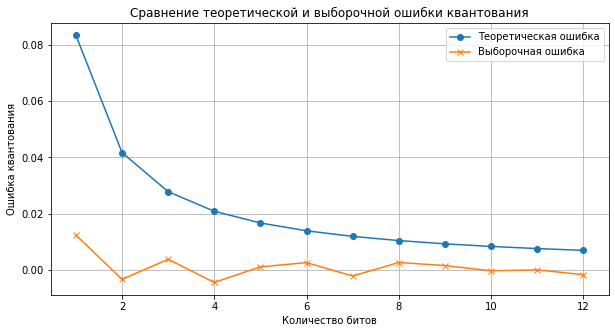

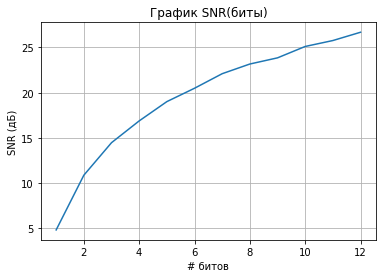

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Пункт 3,4
# Параметры
a = -3
b = 3
xmin = 0
xmax = 1
steps = [0.1, 0.01, 0.001, 0.0001]
bs = range(1, 13) # Биты от 1 до 12
step = 0.01
t = np.arange(a, b + step, step)

print(f"Интервал: {xmin}:{xmax}")
print(f"Количество экспериментов: {len(steps)}, минимальный шаг: {min(steps)}, максимальный шаг: {max(steps)}")


# Функция генерации случайного сигнала (определена ранее)
def gen_rand_sig(t, xmin, xmax):
    return np.random.rand(len(t)) #Изменено на rand вместо randint


# Функция равномерного квантования (определена ранее)
def uquant(x, bits, xmin, xmax):
    levels = 2*bits
    q = (xmax - xmin) / levels
    return np.round((x - xmin) / q) * q + xmin

# Функция вычисления ошибки
def error_m(x, r):
  return np.mean((x - r)*2)

# Функция вычисления SNR
def snr(x, r):
    signal_power = np.var(x) #изменено на var
    noise_power = np.var(x - r) #изменено на var
    if noise_power == 0:
      return float('inf') #Избегаем деления на ноль
    return 10 * np.log10(signal_power / noise_power)


# Генерация сигнала
x = gen_rand_sig(t, xmin, xmax)

theoretical_errors = []
sampled_errors = []
snrs = []
for bits in bs:
    q = (xmax - xmin) / (2*bits)
    e = 0
    snrv = 0
    for step_val in steps:
        # Пересчет t для каждого шага (необходимо, если шаги разные)
        t_step = np.arange(a, b + step_val, step_val)
        x_step = np.interp(t_step, t, x) # интерполяция для сопоставления с новыми t

        r = uquant(x_step, bits, xmin, xmax)
        e += error_m(x_step, r)
        snrv += snr(x_step, r)
    
    avg_error = e / len(steps)
    theoretical_error = (q*2) / 12
    avg_snr = snrv / len(steps)
    sampled_errors.append(avg_error)
    theoretical_errors.append(theoretical_error)
    
    print(f"Биты = {bits}, средняя ошибка = {avg_error:.6f}, теоретическая ошибка = {theoretical_error:.6f}")
    print(f" Среднее SNR = {avg_snr:.2f}")
    snrs.append(avg_snr)

plt.figure(figsize=(10, 5)) #Создаем новый график
plt.plot(bs, theoretical_errors, marker='o', label='Теоретическая ошибка')
plt.plot(bs, sampled_errors, marker='x', label='Выборочная ошибка')
plt.xlabel('Количество битов')
plt.ylabel('Ошибка квантования')
plt.title('Сравнение теоретической и выборочной ошибки квантования')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(bs, snrs)
plt.xlabel('# битов')
plt.ylabel('SNR (дБ)')
plt.grid(True)
plt.title('График SNR(биты)')
plt.show()


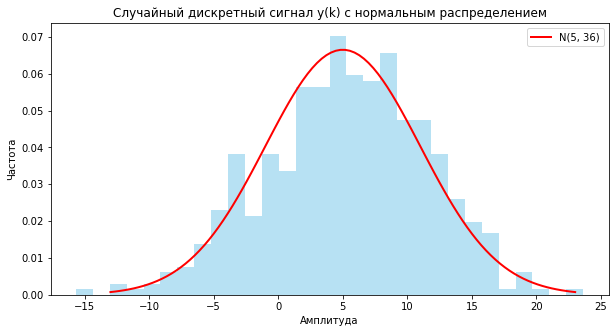

TypeError: can only concatenate list (not "int") to list

<Figure size 864x576 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 5. Синтез случайного сигнала с нормальным распределением
n = 500 # Количество отсчетов
v = 5
m = v
sigma = v + 1
y_k = np.random.normal(loc=m, scale=sigma, size=n)

plt.figure(figsize=(10, 5))
plt.hist(y_k, bins=30, density=True, alpha=0.6, color='skyblue') # Гистограмма для визуализации
x = np.linspace(m - 3 * sigma, m + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, m, sigma), 'r-', lw=2, label=f'N({m}, {sigma**2})') # Плотность вероятности
plt.title('Случайный дискретный сигнал y(k) с нормальным распределением')
plt.xlabel('Амплитуда')
plt.ylabel('Частота')
plt.legend()
plt.show()


# Параметры оптимального квантователя для стандартного нормального распределения (из таблиц или литературы)
# Для простоты возьмем приближенные значения для небольшого количества уровней
optimal_quantizer_params = {
    2: {'thresholds': [-0.577, 0.577], 'levels': [-0.577, 0.577]},
    4: {'thresholds': [-1.151, 0, 1.151], 'levels': [-1.151, 0, 1.151]},
    8: {'thresholds': [-1.812, -0.910, 0, 0.910, 1.812], 'levels': [-1.596, -0.431, 0, 0.431, 1.596]},
    16: {'thresholds': [-2.546, -1.777, -1.218, -0.777, -0.367, 0, 0.367, 0.777, 1.218, 1.777, 2.546], 'levels': [-2.249, -1.446, -0.935, -0.471, -0.041, 0.41, 0.935, 1.446, 2.249]}
}


# 6 и 7. Оптимальное квантование
bits_lloyd = range(1, 5) # 1, 2, 4, 8
plt.figure(figsize=(12, 8))
lloyd_errors = []
lloyd_snr = []

for i, b in enumerate(bits_lloyd):
    levels = 2**b
    try:
        thresholds = optimal_quantizer_params[levels]['thresholds']
        levels_opt = optimal_quantizer_params[levels]['levels']
    except KeyError:
        print(f"Параметры для {levels} уровней не найдены. Пропустим.")
        continue

    # Преобразование в параметры для нашего распределения
    thresholds_prime = thresholds * sigma + m
    levels_prime = levels_opt * sigma + m


    # Оптимальное квантование
    y_quantized = np.zeros_like(y_k)
    for j in range(len(y_k)):
        for k in range(len(thresholds_prime)):
            if y_k[j] <= thresholds_prime[k]:
                y_quantized[j] = levels_prime[k]
                break
            elif k == len(thresholds_prime)-1:
                y_quantized[j] = levels_prime[k]

    # Вычисление ошибки и SNR
    error = np.mean((y_k - y_quantized)**2)
    lloyd_errors.append(error)
    signal_power = np.std(y_k)**2
    noise_power = np.std(y_k - y_quantized)**2
    if noise_power > 0:
      snr = 10 * np.log10(signal_power / noise_power)
      lloyd_snr.append(snr)
    else:
      lloyd_snr.append(float('inf'))

    plt.subplot(2, 2, i + 1)
    plt.plot(y_k, label='Исходный сигнал')
    plt.plot(y_quantized, label='Квантованный сигнал')
    plt.title(f'Оптимальное квантование ({levels} уровней)')
    plt.xlabel('Номер отсчета')
    plt.ylabel('Амплитуда')
    plt.legend()

plt.tight_layout()
plt.show()


# 8. Графики ошибки и SNR для оптимального квантования
plt.figure(figsize=(10, 5))
plt.plot(bits_lloyd, lloyd_errors, marker='o', label='Ошибка квантования')
plt.plot(bits_lloyd, lloyd_snr, marker='x', label='SNR (dB)')
plt.xlabel('Количество битов')
plt.ylabel('Ошибка / SNR')
plt.title('Оптимальное квантование: Ошибка и SNR')
plt.legend()
plt.grid(True)
plt.show()


# 9. Равномерное квантование и сравнение
uniform_errors = []
uniform_snr = []
for b in bits_lloyd:
    levels = 2**b
    q = (y_k.max() - y_k.min()) / levels
    y_quantized_uniform = np.round(y_k / q) * q
    error_uniform = np.mean((y_k - y_quantized_uniform)**2)
    uniform_errors.append(error_uniform)
    signal_power_uniform = np.std(y_k)**2
    noise_power_uniform = np.std(y_k - y_quantized_uniform)**2
    if noise_power_uniform > 0:
      snr_uniform = 10 * np.log10(signal_power_uniform / noise_power_uniform)
      uniform_snr.append(snr_uniform)
    else:
      uniform_snr.append(float('inf'))

#Сравнение
plt.figure(figsize=(10, 5))
plt.plot(bits_lloyd, lloyd_errors, marker='o', label='Оптимальное квантование')
plt.plot(bits_lloyd, uniform_errors, marker='x', label='Равномерное квантование')
plt.xlabel('Количество битов')
plt.ylabel('Ошибка квантования')
plt.title('Сравнение ошибок квантования')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(bits_lloyd, lloyd_snr, marker='o', label='Оптимальное квантование')
plt.plot(bits_lloyd, uniform_snr, marker='x', label='Равномерное квантование')
plt.xlabel('Количество битов')
plt.ylabel('SNR (dB)')
plt.title('Сравнение SNR')
plt.legend()
plt.grid(True)
plt.show()
